In [13]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_theme()

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import RocCurveDisplay as rcd

In [2]:
df = pd.read_csv('Data/ham-spam.csv')
df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [3]:
df = df.drop_duplicates()
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  key issues going forwarda year end reviews rep...    1
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [5]:
vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english')
x = vectorizer.fit_transform(df['Text'])
y = df['IsSpam']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.2, random_state=0)

In [9]:
#The next step is to train a Naive Bayes classifier using Scikit’s MultinomialNB class:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

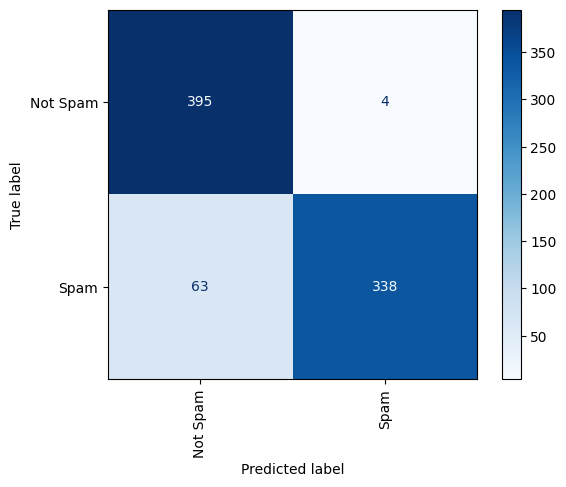

In [11]:
cmd.from_estimator(model, x_test, y_test, display_labels=['Not Spam','Spam'],
                   cmap = 'Blues', xticks_rotation='vertical')

In [12]:
model.score(x_test, y_test)

0.91625

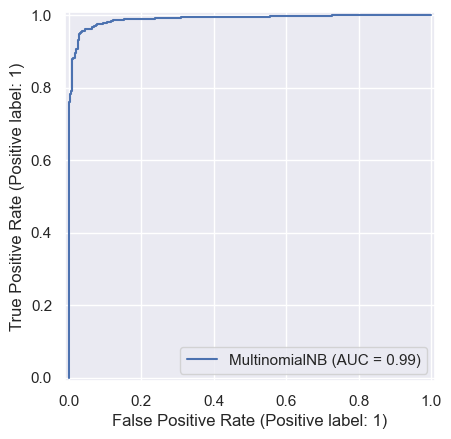

In [14]:
rcd.from_estimator(model, x_test, y_test)

In [15]:
msg = 'Can you attend a code review on Tuesday to make sure the logic is solid?'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

In [16]:
msg = 'Why pay more for expensive meds when you can order them online ' \
'and save $$$?'
input = vectorizer.transform([msg])
model.predict(input)[0]

1

In [17]:
#What is the probability that the message is spam?
model.predict_proba(input)[0][1]

0.9977283691369301